In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
import category_encoders

In [59]:
df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental Health Analysis During Online Learning.csv")

In [60]:
df

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same
...,...,...,...,...,...,...,...,...,...,...
995,Diya,Female,26,MA,11.3,6.8,9.1,Medium,No,Same
996,Aarav,Male,20,BTech,5.5,6.7,6.8,Low,Yes,Same
997,Myra,Female,15,Class 9,7.1,4.1,1.9,Low,Yes,Declined
998,Myra,Female,20,BA,4.4,7.5,4.5,Medium,No,Improved


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [62]:
df_numeric = df.select_dtypes(include = 'number')

In [63]:
df_numeric

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
0,15,7.1,8.9,9.3
1,25,3.3,5.0,0.2
2,20,9.5,5.4,6.2
3,20,10.8,5.6,5.5
4,17,2.8,5.4,3.1
...,...,...,...,...
995,26,11.3,6.8,9.1
996,20,5.5,6.7,6.8
997,15,7.1,4.1,1.9
998,20,4.4,7.5,4.5


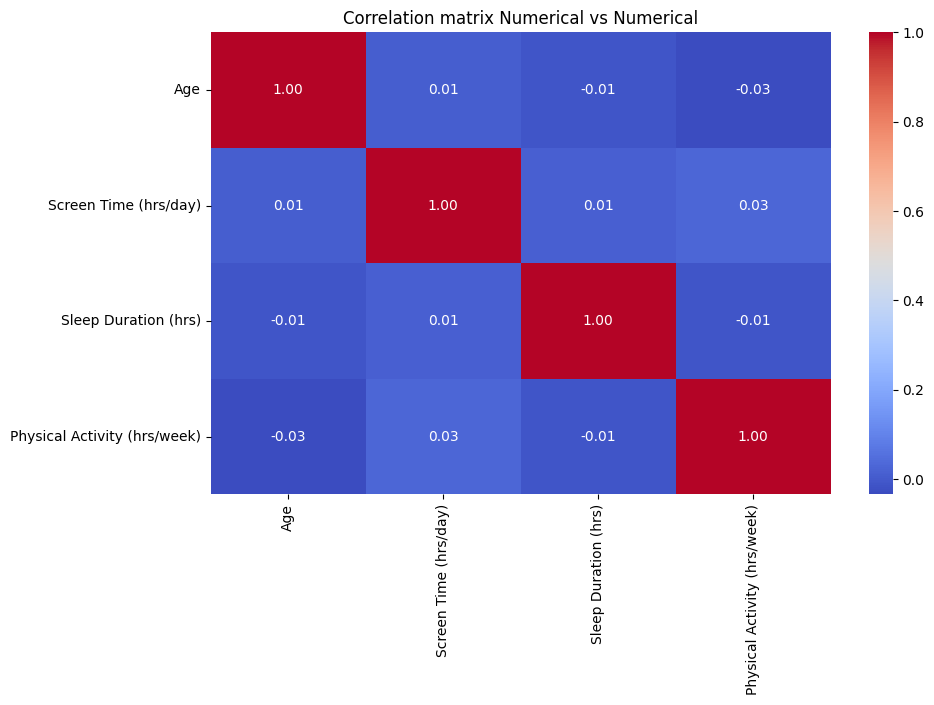

In [64]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


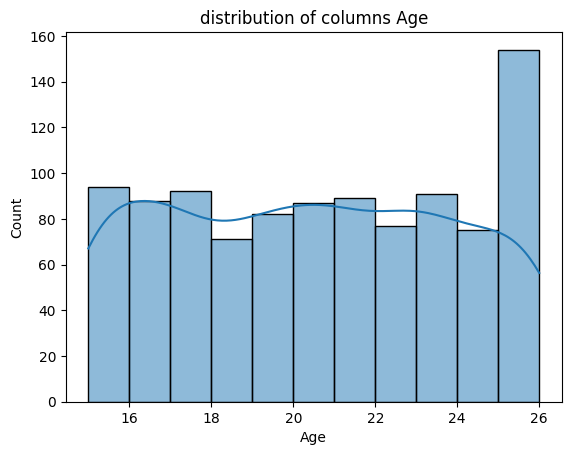

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


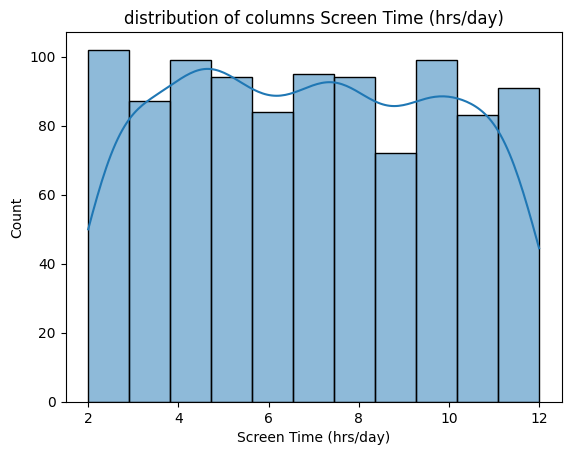

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


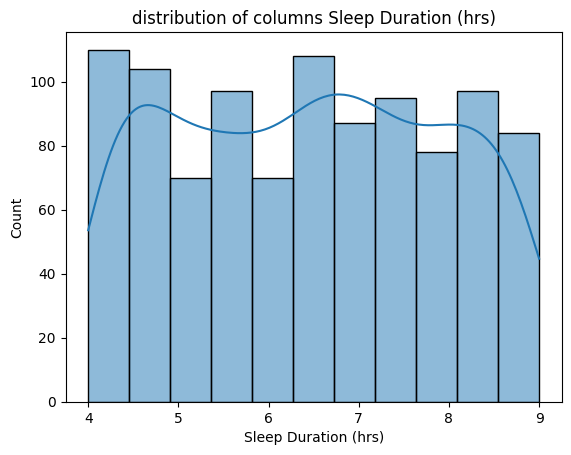

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


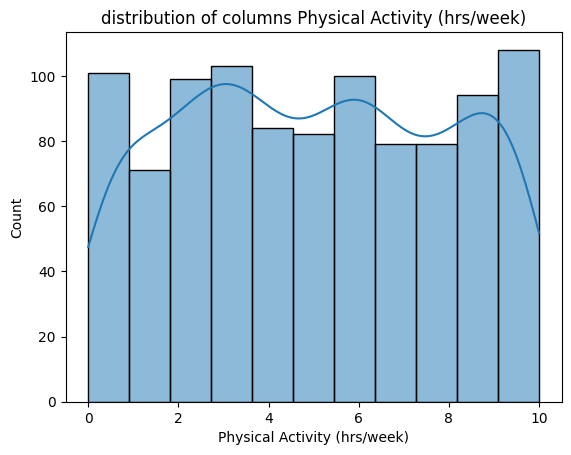

In [252]:
for col in df_numeric :
    sns.histplot(df[col],kde = True)
    plt.title(f'distribution of columns {col}')
    plt.show()

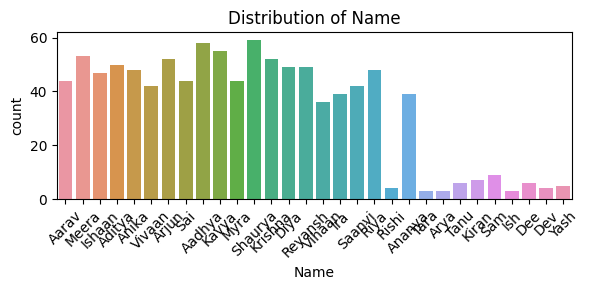

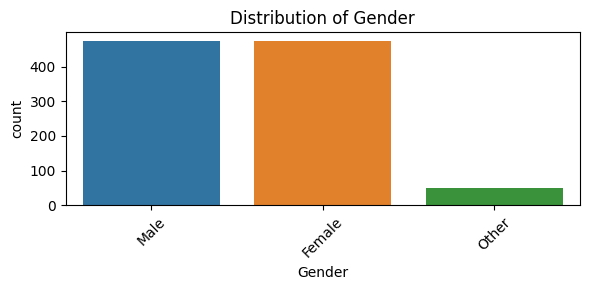

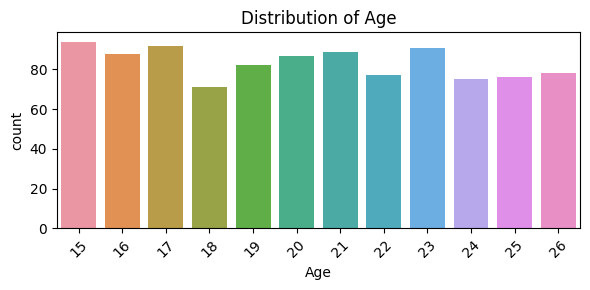

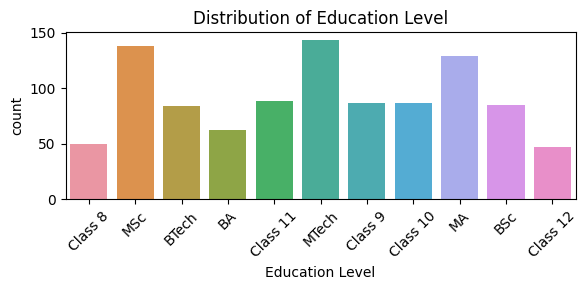

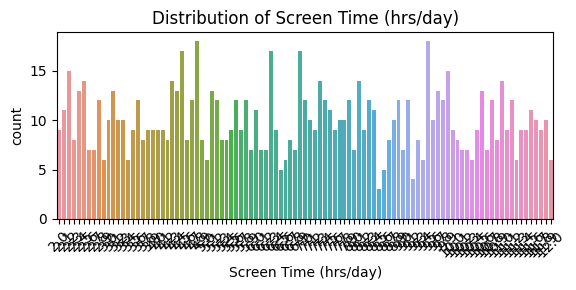

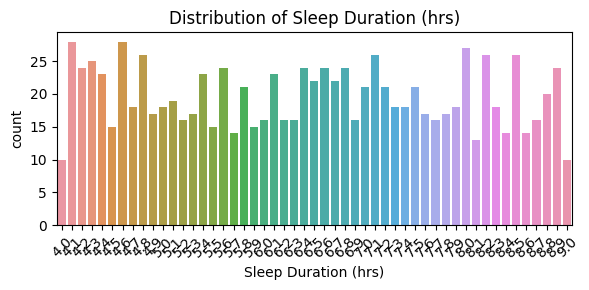

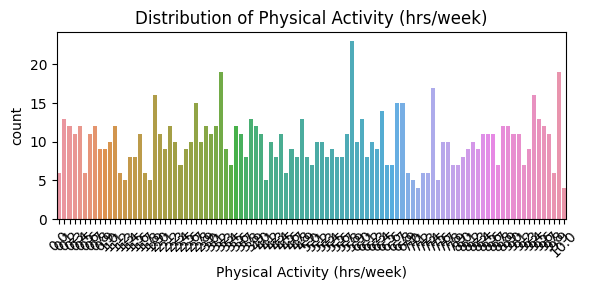

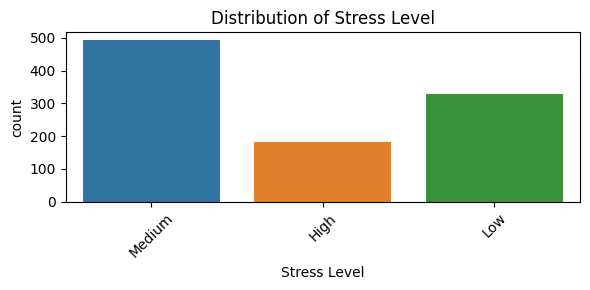

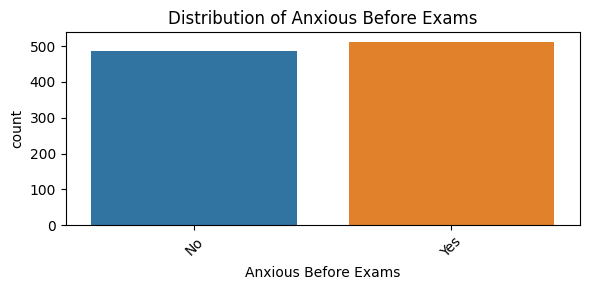

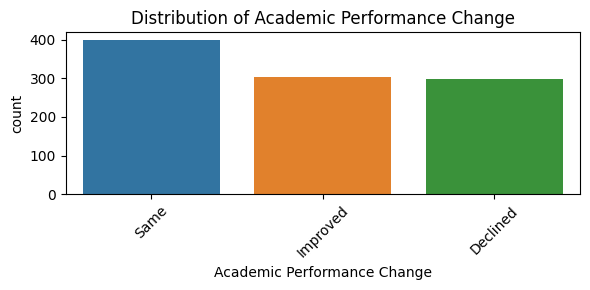

In [253]:
for column in df.columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [254]:
df['Academic Performance Change'].value_counts(normalize=True)


Academic Performance Change
Same        0.399
Improved    0.303
Declined    0.298
Name: proportion, dtype: float64

In [65]:
df['Name'].unique()

array(['Aarav', 'Meera', 'Ishaan', 'Aditya', 'Anika', 'Vivaan', 'Arjun',
       'Sai', 'Aadhya', 'Kavya', 'Myra', 'Shaurya', 'Krishna', 'Diya',
       'Reyansh', 'Vihaan', 'Ira', 'Saanvi', 'Riya', 'Rishi', 'Ananya',
       'Tara', 'Arya', 'Tanu', 'Kiran', 'Sam', 'Ish', 'Dee', 'Dev',
       'Yash'], dtype=object)

In [66]:
df['Name'].nunique()

30

In [67]:
df['Education Level'].nunique()

11

In [68]:
df['Education Level'].unique()


array(['Class 8', 'MSc', 'BTech', 'BA', 'Class 11', 'MTech', 'Class 9',
       'Class 10', 'MA', 'BSc', 'Class 12'], dtype=object)

In [69]:
df['Stress Level'].nunique()

3

In [70]:
df['Stress Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [71]:
df['Anxious Before Exams'].nunique()

2

In [72]:
df['Anxious Before Exams'].unique()

array(['No', 'Yes'], dtype=object)

In [73]:
df['Academic Performance Change'].nunique()

3

In [74]:
df['Academic Performance Change'].unique()

array(['Same', 'Improved', 'Declined'], dtype=object)

In [109]:
X = df.drop(columns=["Name", "Academic Performance Change"]) 
y = df["Academic Performance Change"]


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,OrdinalEncoder
from category_encoders import CountEncoder

In [77]:
label = LabelEncoder()
encoded_y = label.fit_transform(y)

In [78]:
encoded_y

array([2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0,
       0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0,
       0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.2,random_state = 42 )

In [110]:
numeric_cols  = ['Screen Time (hrs/day)','Sleep Duration (hrs)','Physical Activity (hrs/week)','Age']
ordinal =['Education Level','Stress Level']
categoric_cols = ['Gender','Anxious Before Exams']



In [111]:
education_categories = ['Class 8','Class 9','Class 10','Class 11','Class 12','BA','BSc',
                        'BTech','MA','MSc','MTech']
stress_level = ['Low','Medium','High']


In [112]:
one_hot = OneHotEncoder(drop='first')
ordinal_encoders = OrdinalEncoder(categories=[education_categories,stress_level])
scaler = StandardScaler()


In [255]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')

In [293]:
preprocessor = ColumnTransformer(transformers=[
    ('onehot',one_hot,categoric_cols),
    ('ordinal',ordinal_encoders,ordinal),
    ('power', power, numeric_cols),
    
    
])

In [294]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=None,random_state = 42)

In [295]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [327]:
dt = DecisionTreeClassifier(criterion='gini',max_depth= None)
lr = LogisticRegression(max_iter = 1000)
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',probability = True)

In [328]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('svm', svc)
    ],
    voting='hard'  # or 'hard'
)


In [329]:
bagging_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(),
    n_estimators=15,        # number of trees
    random_state=42
)    

In [330]:
from sklearn.ensemble import AdaBoostClassifier

In [331]:
base_model = DecisionTreeClassifier(max_depth=5)

# Create AdaBoost model
ada_model = AdaBoostClassifier(
    base_estimator=base_model,   # weak learner
    n_estimators=50,             # total models to train
    learning_rate=1.0,           # step size (default 1.0)
    random_state=42
)

In [332]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('voting',voting_clf)
])

In [333]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Anxious Before Exams']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Class '
                                                                              '8',
                                                                              'Class '
                                                                              '9',
                                                                              'Class '
                                                                              '10',
                                                                              'Class '
                                                                              '11',
                                                                              'Class '
                                                                              '12',
                                                                              'BA',
                                                                              'BSc',
                                                                              'BTech',
                                                                              'MA',
                                                                              'MSc',
                                                                              'MTech'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Education Level',
                                                   'Stress Level']),
                                                 ('power', PowerTransformer(),
                                                  ['Screen Time (hrs/day)',
                                                   'Sleep Duration (hrs)',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Age'])])),
                ('voting',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=1000)),
                                              ('dt', DecisionTreeClassifier()),
                                              ('svm',
                                               SVC(probability=True))]))])

In [334]:
y_pred = pipeline.predict(X_test)

In [335]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [336]:
y_test

array([1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0])

In [337]:
y_pred_train = pipeline.predict(X_train)

In [338]:
y_pred_train 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,